In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lats_lngs)

In [4]:
#Use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-86.92265646667414 56.24992092066583
-77.68769338162916 -6.019142812173925
80.66464214352749 46.45317437980921
-79.22675853018914 -11.942574083501654
57.77565136266355 74.02033370069984
-19.383522831697135 -83.53603264472072
80.8355701673895 7.738052053827758
10.142482776406283 -40.323967937142996
54.32712820047175 -77.20502207638575
52.291568872934874 -42.67924067756696
43.17688768258981 -36.34336789564191
26.407866856596982 -41.70458506751638
86.02473053785343 -7.515058752251434
-49.95931985996213 -4.641826034401447
6.090548552064206 77.68783392165147
-80.12278070209848 89.2155516812069
-42.23937442201971 -46.79756438773571
82.60828404278797 70.3299593682267
60.35317570910851 -25.20168932713169
-26.603918716252032 -59.998389658872384
53.669947803248306 48.88089982465945
-51.93098746303266 -75.80954979146821
-31.208062340587183 59.41429732555713
-39.663078372023136 -76.52705368493106
-84.98564221408691 89.36739998102505
-33.285173737197184 -66.09373519409817
-25.068837052203023 52.627

-43.56784719774077 -22.59164881988282
44.82785741608396 41.90516334725032
34.5931509058487 43.07235150080527
74.73512744241043 -53.03951298151374
66.79824754884788 54.720674483053614
-36.86911982932633 75.44543160091007
-72.0015221527154 -65.92032975904903
-15.051240112976387 -76.5581944707048
24.695638677611456 -84.75238501704874
32.27812089052314 71.58448204399176
1.4388881054613165 -69.83739747985811
-84.53799154991462 -59.84971539667569
66.87848380909386 28.427443143753038
80.65584208268481 57.74020077908591
-58.636043841658605 -23.247050214393
-27.87937159416071 41.98790300895854
57.788105567218224 9.667108910141906
88.31475591723446 -52.61259827885571
-12.793745075221352 -49.6435684136381
86.66000486917525 -27.961559576752002
19.906726001536526 -89.95224258510073
14.42027719661759 -42.451111608852784


In [5]:
#Import citipy module
from citipy import citipy

In [6]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
#Print the city count to confirm sufficient count
len(cities)

600

In [7]:
#Import the requests library and API key
import requests
from config import weather_api_key

In [8]:
#Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key

In [10]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in the list
for i, city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
#Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | znamenskoye
Processing Record 6 of Set 1 | pisco
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | carutapera
Processing Record 9 of Set 1 | moose factory
Processing Record 10 of Set 1 | nanortalik
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | kanniyakumari
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | rocha
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | grindavik
Processing Record 18 of Set 1 | presidencia roque saenz pena
Processing Record 19 of Set 1 | khryashchevka
Processing Record 20 of 

Processing Record 38 of Set 4 | mastung
Processing Record 39 of Set 4 | los llanos de aridane
Processing Record 40 of Set 4 | piacabucu
Processing Record 41 of Set 4 | santa helena de goias
Processing Record 42 of Set 4 | husavik
Processing Record 43 of Set 4 | dharur
Processing Record 44 of Set 4 | nacala
Processing Record 45 of Set 4 | grand-lahou
Processing Record 46 of Set 4 | kyritz
Processing Record 47 of Set 4 | lagoa
Processing Record 48 of Set 4 | becerril
Processing Record 49 of Set 4 | salalah
Processing Record 50 of Set 4 | hashtgerd
Processing Record 1 of Set 5 | labrea
Processing Record 2 of Set 5 | miragoane
Processing Record 3 of Set 5 | torbay
Processing Record 4 of Set 5 | batticaloa
Processing Record 5 of Set 5 | qaqortoq
Processing Record 6 of Set 5 | itarema
Processing Record 7 of Set 5 | sinkat
City not found. Skipping...
Processing Record 8 of Set 5 | ciudad real
Processing Record 9 of Set 5 | guaramirim
Processing Record 10 of Set 5 | sarrebourg
Processing Recor

Processing Record 29 of Set 8 | tabuk
Processing Record 30 of Set 8 | sao felix do xingu
Processing Record 31 of Set 8 | obera
Processing Record 32 of Set 8 | rundu
Processing Record 33 of Set 8 | cidreira
Processing Record 34 of Set 8 | atar
Processing Record 35 of Set 8 | birao
Processing Record 36 of Set 8 | mangrol
Processing Record 37 of Set 8 | maku
Processing Record 38 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 39 of Set 8 | santo antonio do ica
Processing Record 40 of Set 8 | veraval
Processing Record 41 of Set 8 | san felipe
Processing Record 42 of Set 8 | sept-iles
Processing Record 43 of Set 8 | korla
Processing Record 44 of Set 8 | colmenar viejo
Processing Record 45 of Set 8 | cannington
Processing Record 46 of Set 8 | scottsburgh
City not found. Skipping...
Processing Record 47 of Set 8 | carnarvon
Processing Record 48 of Set 8 | sanary-sur-mer
Processing Record 49 of Set 8 | san carlos de bariloche
Processing Record 50 of Set 8 | ormara
Processing

Processing Record 15 of Set 12 | yialos
City not found. Skipping...
Processing Record 16 of Set 12 | bissau
Processing Record 17 of Set 12 | cairo
Processing Record 18 of Set 12 | taltal
Processing Record 19 of Set 12 | brebu
Processing Record 20 of Set 12 | elat
Processing Record 21 of Set 12 | tazovskiy
Processing Record 22 of Set 12 | san miguel
Processing Record 23 of Set 12 | tarsus
Processing Record 24 of Set 12 | taoudenni
Processing Record 25 of Set 12 | bauchi
Processing Record 26 of Set 12 | sergeyevka
Processing Record 27 of Set 12 | bharatpur
Processing Record 28 of Set 12 | chelyabinsk-70
City not found. Skipping...
Processing Record 29 of Set 12 | sosva
Processing Record 30 of Set 12 | maldonado
Processing Record 31 of Set 12 | kathmandu
Processing Record 32 of Set 12 | necochea
Processing Record 33 of Set 12 | tobermory
Processing Record 34 of Set 12 | rusne
Processing Record 35 of Set 12 | tel aviv-yafo
Processing Record 36 of Set 12 | campo
Processing Record 37 of Set 

In [11]:
len(city_data)

557

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,288.81,91,87,4.73,ZA,2022-05-24 18:54:13
1,Hermanus,-34.4187,19.2345,288.04,85,100,4.13,ZA,2022-05-24 18:57:50
2,Cape Town,-33.9258,18.4232,289.32,94,75,3.09,ZA,2022-05-24 18:57:51
3,Znamenskoye,57.1281,73.8282,287.96,67,12,2.43,RU,2022-05-24 18:57:51
4,Pisco,-13.7000,-76.2167,293.16,77,2,5.14,PE,2022-05-24 18:57:52
5,Carutapera,-1.1950,-46.0200,299.72,85,100,2.48,BR,2022-05-24 18:57:52
6,Moose Factory,51.2585,-80.6094,294.15,30,40,8.75,CA,2022-05-24 18:57:53
7,Nanortalik,60.1432,-45.2371,274.35,65,41,14.07,GL,2022-05-24 18:57:53
8,Ribeira Grande,38.5167,-28.7000,292.37,82,75,4.12,PT,2022-05-24 18:57:54
9,Kanniyakumari,8.0833,77.5667,299.85,82,96,6.98,IN,2022-05-24 18:57:55


In [13]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2022-05-24 18:54:13,-33.5906,26.8910,288.81,91,87,4.73
1,Hermanus,ZA,2022-05-24 18:57:50,-34.4187,19.2345,288.04,85,100,4.13
2,Cape Town,ZA,2022-05-24 18:57:51,-33.9258,18.4232,289.32,94,75,3.09
3,Znamenskoye,RU,2022-05-24 18:57:51,57.1281,73.8282,287.96,67,12,2.43
4,Pisco,PE,2022-05-24 18:57:52,-13.7000,-76.2167,293.16,77,2,5.14
...,...,...,...,...,...,...,...,...,...
552,Mitu,CO,2022-05-24 19:09:12,1.1983,-70.1733,300.76,82,73,1.18
553,Kemijarvi,FI,2022-05-24 19:13:39,66.7131,27.4306,286.15,55,71,3.20
554,Hirtshals,DK,2022-05-24 19:13:39,57.5881,9.9592,285.29,87,100,3.19
555,Araguacu,BR,2022-05-24 19:13:40,-12.9306,-49.8264,305.47,32,4,1.56


In [14]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
#Import the time module
import time
#Get today's date in seconds
today = time.strftime("%x")
today

'05/24/22'

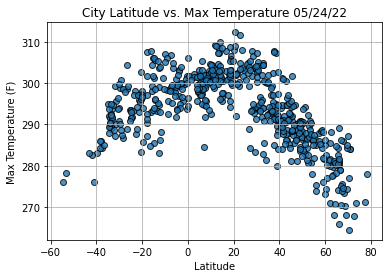

In [17]:
#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

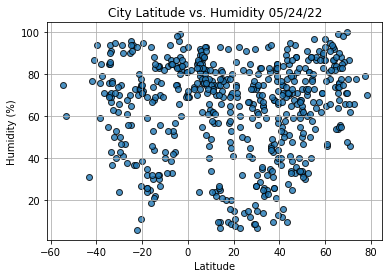

In [18]:
#Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

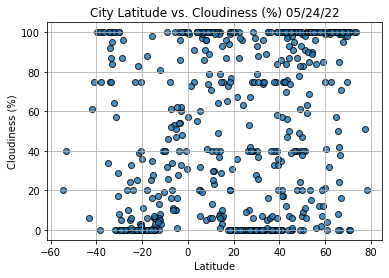

In [19]:
#Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

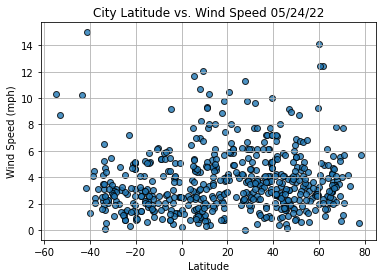

In [20]:
#Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()

In [66]:
#Import linregress
from scipy.stats import linregress

#Create a function to create perform linear regression on the weather data
#and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    #Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [67]:
#Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

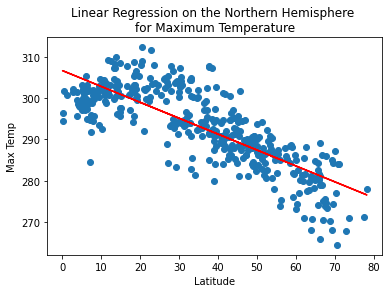

In [68]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp', (10,40))

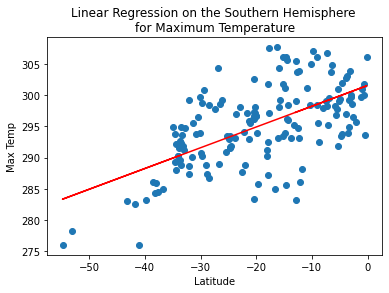

In [69]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

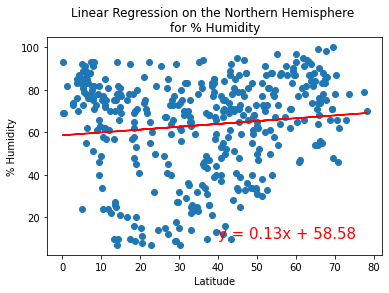

In [70]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

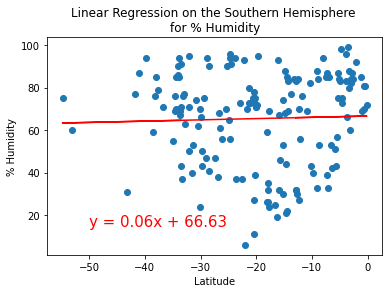

In [71]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

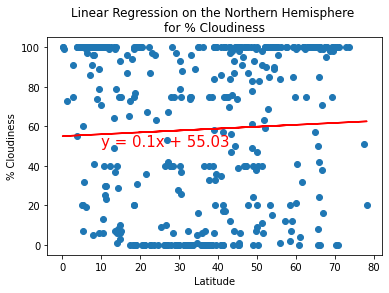

In [72]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,50))

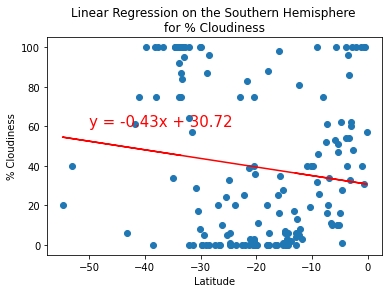

In [73]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

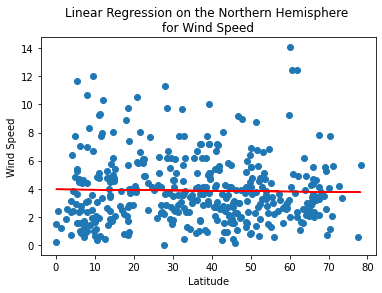

In [74]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

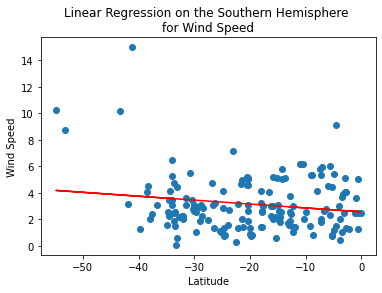

In [75]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))